In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
temp1 = (calc_temps('2016-08-01', '2016-08-07'))
temp1

[(72.0, 77.79545454545455, 83.0)]

In [30]:
temp2 = (calc_temps('2015-08-01', '2015-08-07'))
temp2

[(69.0, 78.27272727272727, 85.0)]

In [31]:
temp3 = (calc_temps('2014-08-01', '2014-08-07'))
temp3

[(71.0, 77.45652173913044, 83.0)]

In [32]:
temp4 = (calc_temps('2013-08-01', '2013-08-07'))
temp4

[(69.0, 76.08163265306122, 81.0)]

### Average Temp to be expected is around 76-78 deg F in first week of Aug 

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [65]:
df = pd.DataFrame(temp1, columns =["tmin", "tavg", "tmax"])
df.loc[len(df.index)] = [69.0, 78.27272727272727, 85.0]
df.loc[len(df.index)] = [71.0, 77.45652173913044, 83.0]
df.loc[len(df.index)] = [69.0, 76.08163265306122, 81.0]

df

,tmin,tavg,tmax
0,72.0,77.795455,83.0
1,69.0,78.272727,85.0
2,71.0,77.456522,83.0
3,69.0,76.081633,81.0


In [74]:
year = ['2016','2015','2014', '2013']
df["Year"] = year
df.set_index("Year", inplace = True)
df

,tmin,tavg,tmax
Year,,,
2016,72.0,77.795455,83.0
2015,69.0,78.272727,85.0
2014,71.0,77.456522,83.0
2013,69.0,76.081633,81.0


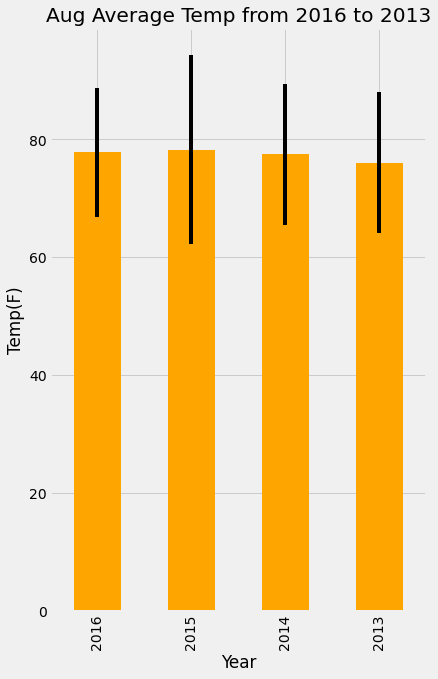

In [79]:
# plot the average temp 
plt.figure(figsize=(6,10))
ax=df["tavg"].plot.bar(yerr=(df["tmax"]-df["tmin"]), color="orange")
plt.title("Aug Average Temp from 2016 to 2013")
plt.ylabel("Temp(F)")
plt.xlabel("Year")
ax.axes.get_xaxis().set_visible(True)
plt.show()

### Daily Rainfall Average

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


### Daily Temperature Normals

In [ ]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session